## 第五章 神经网络
### 5.1 神经元模型
神经网络中最基本的单元是`神经元`，每个神经元与其它神经元相互连接，当某个神经元接受到信号并超过`阈值`时，通过`激活函数`输出信号，向其它神经元传递信息。    
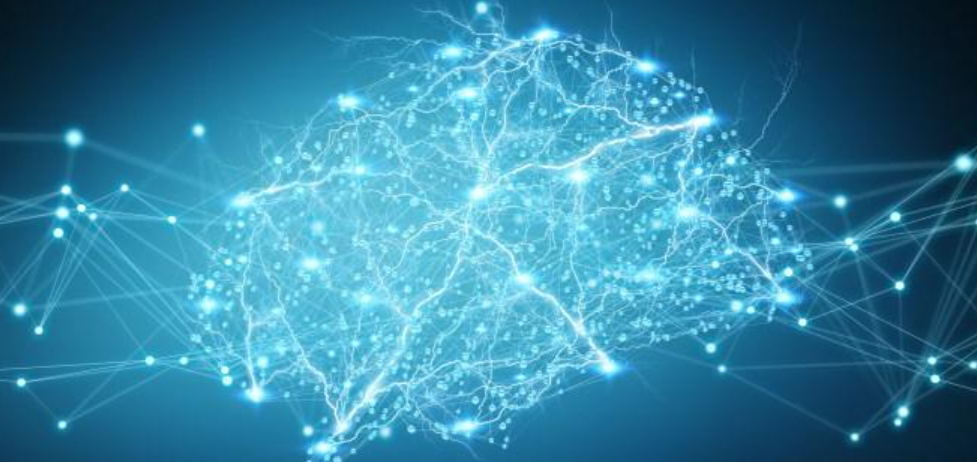    
一直沿用至今的`“M-P神经元模型”`正是对这一结构进行了抽象，也称“阈值逻辑单元“，其中树突对应于输入部分，每个神经元收到n个其他神经元传递过来的输入信号，这些信号通过带权重的连接传递给细胞体，这些权重又称为`连接权（connection weight）`。细胞体分为两部分，前一部分计算总输入值（即输入信号的加权和，或者说累积电平），后一部分先计算总输入值与该`神经元阈值`的差值，然后通过`激活函数（activation function）`的处理，产生输出从轴突传送给其它神经元。M-P神经元模型如下图所示：   
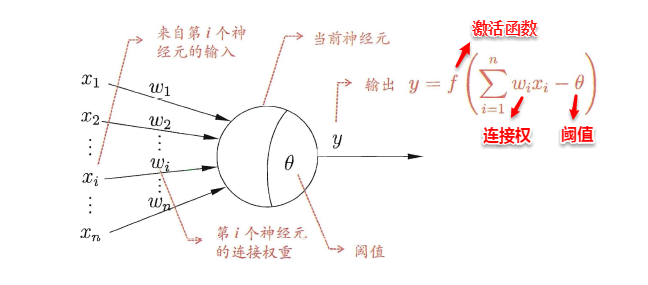    
典型的激活函数是`Sigmoid函数`，其表达式为：$f(x) = \frac{1}{1+e^{-x}}$，输出值在0到1之间，输出值越大，神经元的输出越强。   
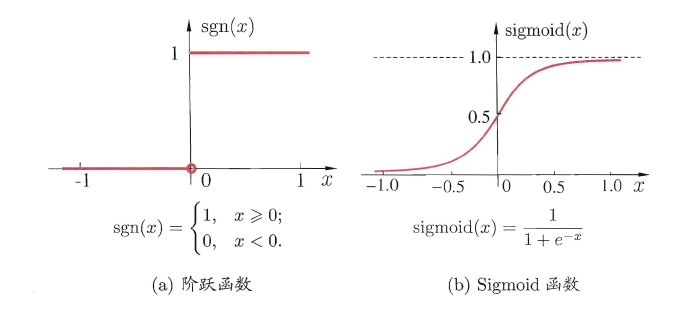     
### 5.2 感知机多层神经网络
- `感知机`：输入层只有一层，输出层只有一层，中间没有隐藏层。其中输入层`只接收信号`，输出层是M-P神经元模型。其思想类似于`逻辑回归`。  
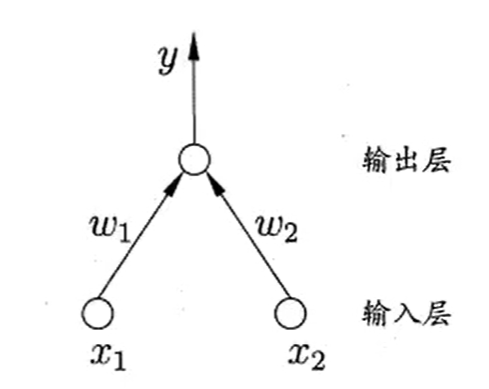   
**感知机可以处理线性可分问题(如与或非问题)，但是对于非线性可分问题(如亦或问题)，需要增加隐藏层。**   
- `多层功能神经元`：输入层与输出层之间的层称为隐含层或隐层（hidden layer），隐层和输出层的神经元都是具有激活函数的功能神经元。只需包含一个隐层便可以称为多层神经网络，常用的神经网络称为“多层前馈神经网络”（multi-layer feedforward neural network）   
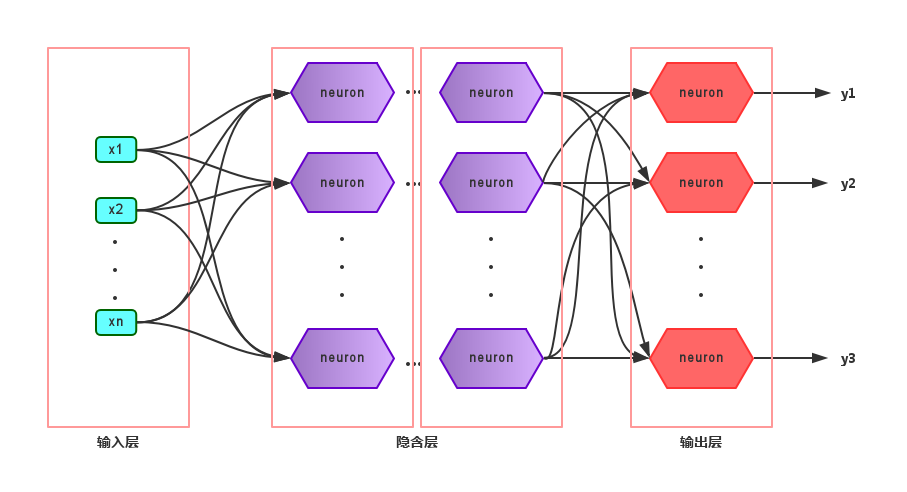    
- 每层神经元与下一层所有神经元都有连接，系数称为`连接权`。   
- 神经元之间不存在同层连接
- 不存在跨层连接



### 5.3 误差逆传播算法(BP)
**神经网络“学”到的东西蕴含在连接权与阈值中**，这些权值和阈值是通过误差逆传播算法(BP)来学习的。BP算法是一种误差反向传播算法，它通过计算输出层的误差，并将其反向传播到隐藏层，再反向传播到输入层，以更新连接权与阈值。本质还是基于`梯度下降`。  
以训练单隐层的前馈神经网络为例，介绍BP神经网络的算法思想。  
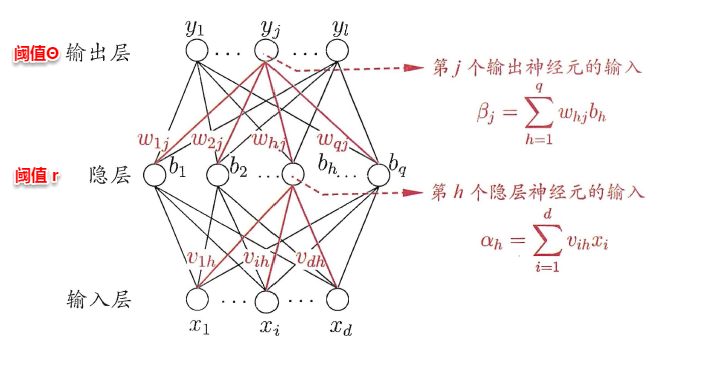    
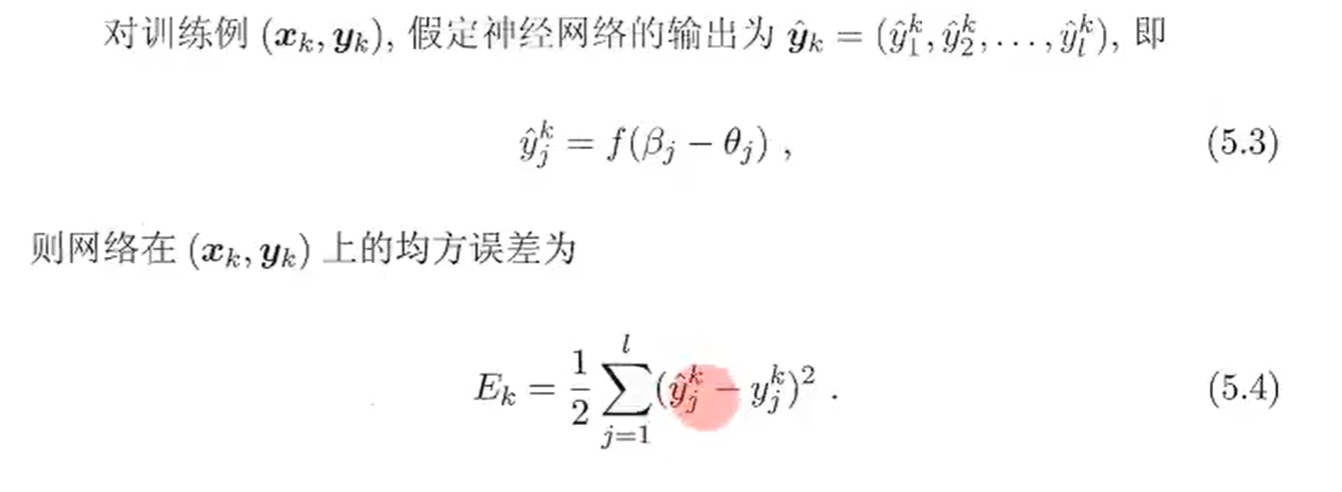    
其中f为sigmoid函数，Ek为损失函数，计算损失函数对每类参数的偏导，通过梯度下降法更新参数。   
求导过程：  
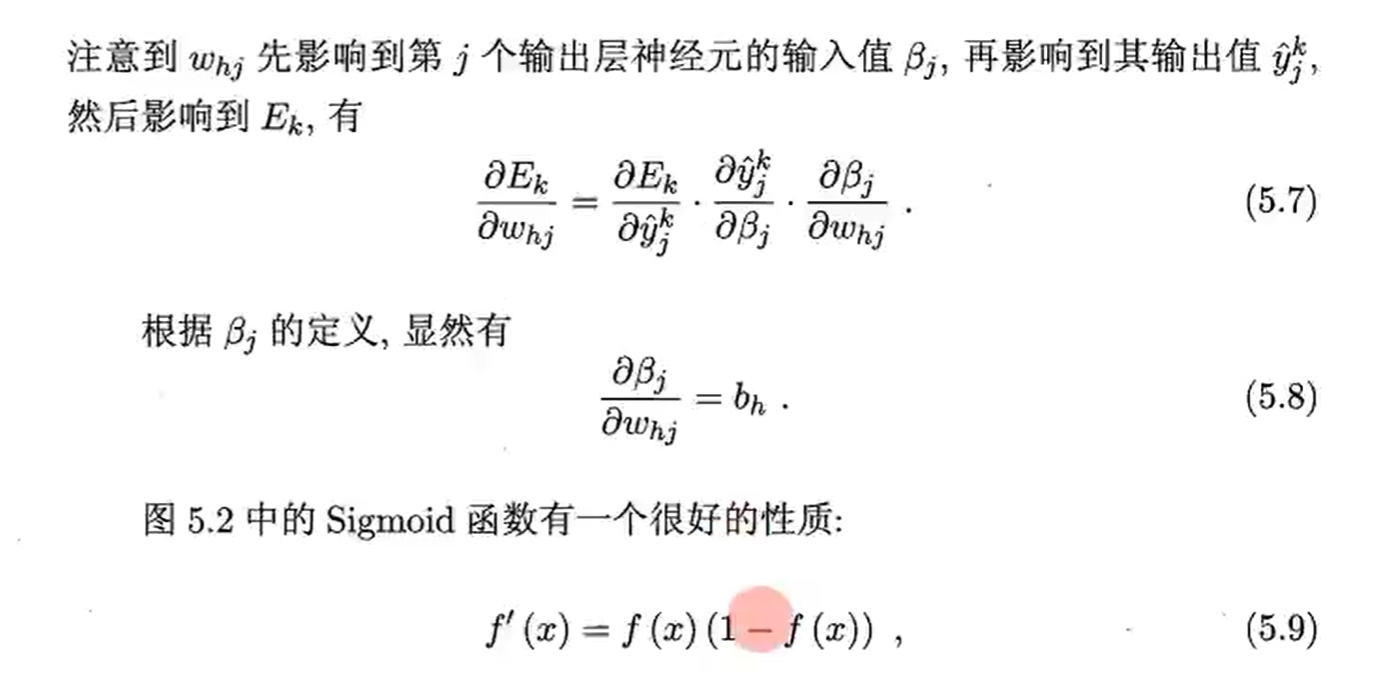    
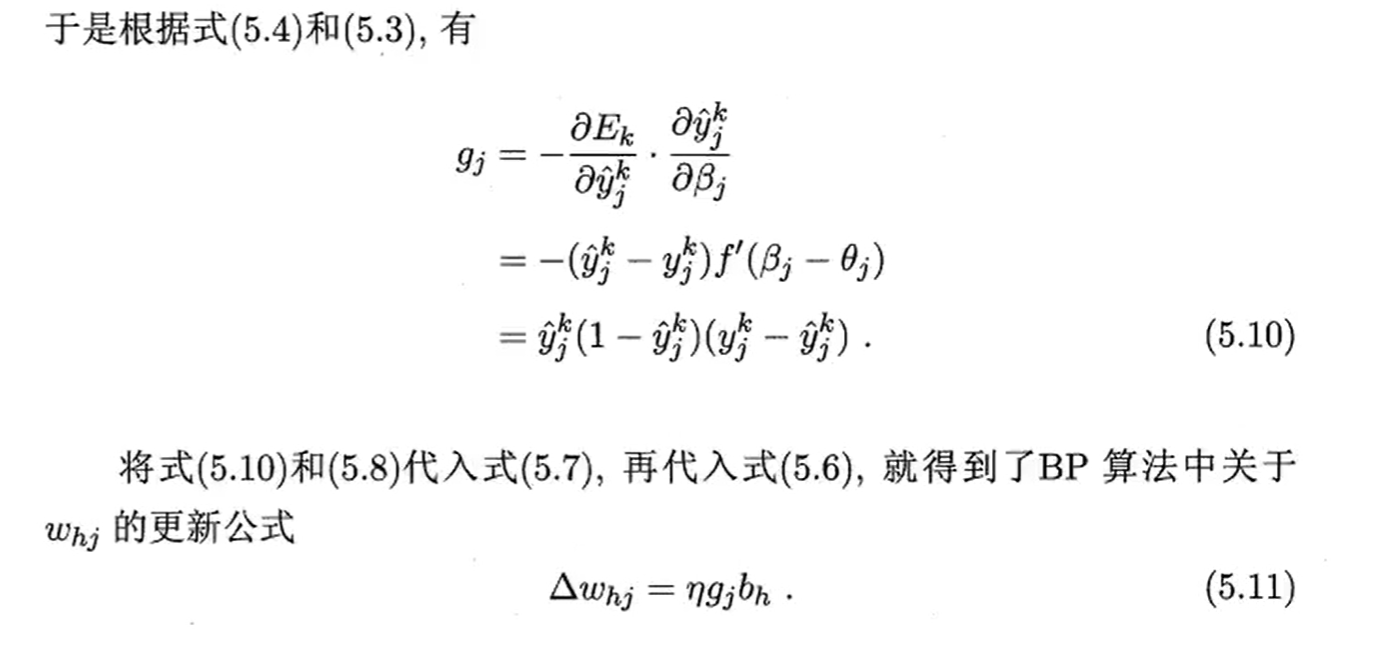    
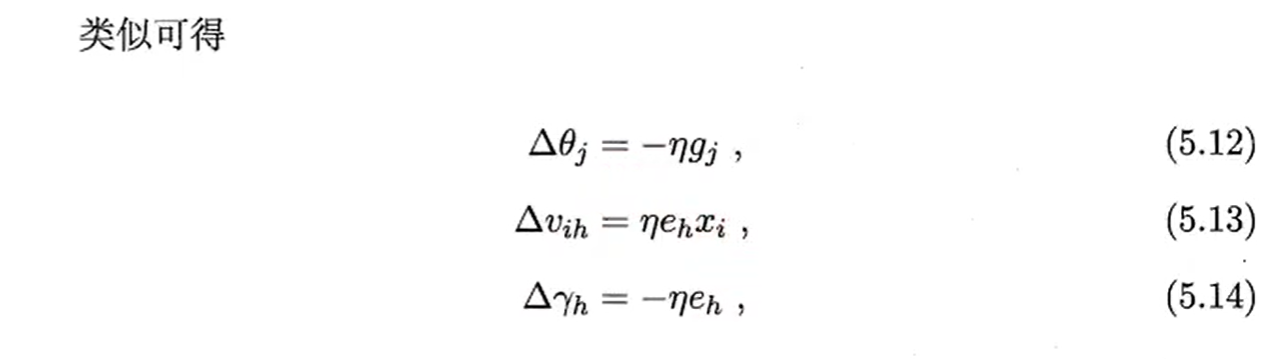    
其中Vih的推导过程如下：  
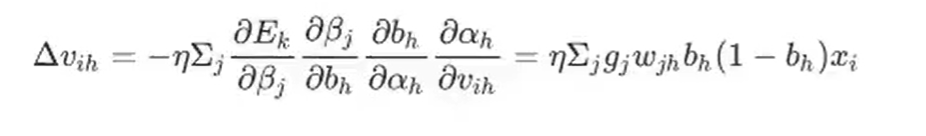   
由于输入层的每一个连接权会影响所有输出单元的输出，因此，存在**求和**。且注意到每一层的阈值的梯度相当于输入为-1时的权重梯度。   
学习率η∈（0，1）控制着沿反梯度方向下降的步长，若步长太大则下降太快容易产生震荡，若步长太小则收敛速度太慢，一般地常把η设置为0.1，有时更新权重时会将输出层与隐含层设置为不同的学习率。BP算法的基本流程如下所示：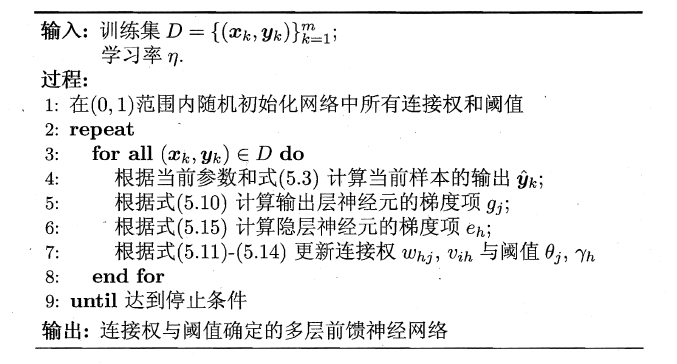  

BP算法的更新规则是基于每个样本的预测值与真实类标的均方误差来进行权值调节，即标准BP算法每次更新只针对于**单个样例**。需要注意的是：累计BP算法的最终目标是要最小化**整个训练集D**上的累积误差，即：   
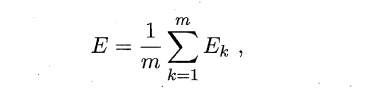   
BP神经网络强大的学习能力常常容易造成过拟合问题，有以下两种策略来缓解BP网络的过拟合问题：  
- 早停：将数据分为训练集与测试集，训练集用于学习，测试集用于评估性能，若在训练过程中，训练集的累积误差降低，而测试集的累积误差升高，则停止训练。
- 正则化：通过正则化项来限制网络的复杂度，使得网络的权值更加稳定，防止过拟合。常用的正则化项有L1正则化、L2正则化、Dropout正则化等。    
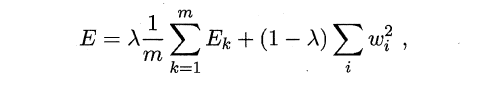

### 5.4 局部最小和全局最小
利用梯度下降的方法寻找最优参数的过程中，目标是使得**损失函数最小**，但是由于局部最小和全局最小处的梯度均为0，而当梯度趋于0时，算法无法继续下降，使得寻找最优参数的过程不一定能够找到全局最优解。   
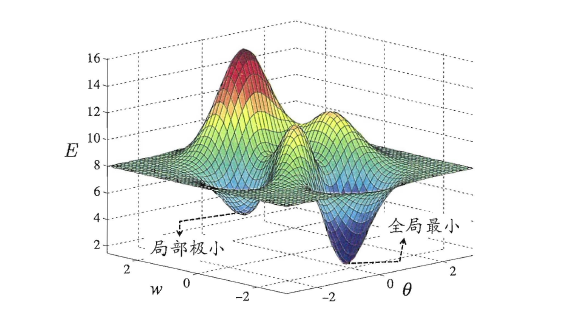    
跳出局部最小的思路：
- 以多组不同的参数值初始化多个神经网络(可以理解为从不同的地方开始下山)，并选择其中损失函数最小的模型作为最终的模型。
- 使用“模拟退火”的方法，在每一步迭代中，以一定概率不走梯度方向，并且在迭代过程中，接受“次最优”的概率要逐渐减小。当然，也有一定可能跳出全局最小。
- 随机梯度下降法：在每一步迭代中，**随机**选择一个方向，而不是按照梯度下降的方向。


### 5.5 深度学习
理论上，参数越多的模型，其复杂度也越高、“容量”越大，即可完成更复杂的学习任务。而提升模型复杂度主要有两个途径：
- 增加模型的隐层数
- 增加隐层的神经元数目   

因为增加隐层数不仅可以增加拥有的激活函数的神经元个数，还增加了激活函数的嵌套层数，从而增加隐层数目比增加神经元个数更有效。    
随着层数的增加，参数的数目也越来越多，如果使用经典算法（如BP）继续训练，往往会“发散”。为解决这一问题，提出两个思路：
- 预训练+微调：先将大量参数分组，对每组先找到局部看来比较好的设置，然后基于这些局部较优的结果联合起来进行全局最优。   
- 权共享：将相同的权重共享给多个神经元，从而减少参数的数量，提升模型的效率。如CNN中的卷积核共享。   
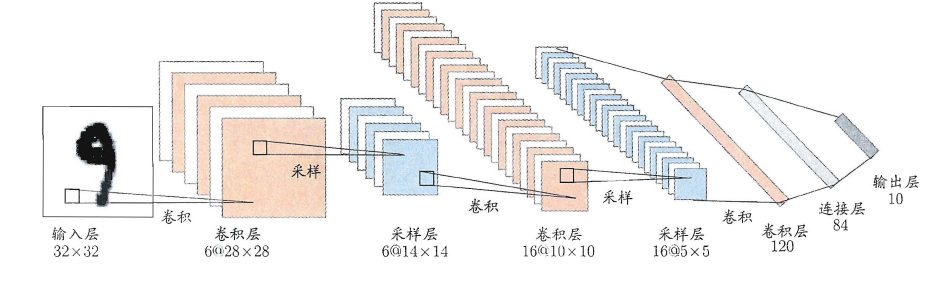    
 
**深度学习可以理解为一种特征学习（feature learning）或者表示学习（representation learning），无论是DBN还是CNN，都是通过多个隐层来把与输出目标联系不大的初始输入转化为与输出目标更加密切的表示，使原来只通过单层映射难以完成的任务变为可能。即通过多层处理，逐渐将初始的“低层”特征表示转化为“高层”特征表示，从而使得最后可以用简单的模型来完成复杂的学习任务。**